In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

In [199]:
data_path = 'data/iris/'

df_iris = pd.read_csv(data_path + 'iris.data', header=None)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df_bezdek = pd.read_csv(data_path + 'iris.data', header=None)
df_bezdek.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


In [200]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [201]:
df_bezdek.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Tìm hiểu dữ liệu**
- sepal length (cm): là độ dài của đài hoa
- sepal width (cm): là chiều rộng của đài hoa
- petal length (cm): là độ dài của cánh hoa
- petal width (cm): là chiều rộng của cánh hoa

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

In [203]:
df_iris.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.05,0.43,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.76,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


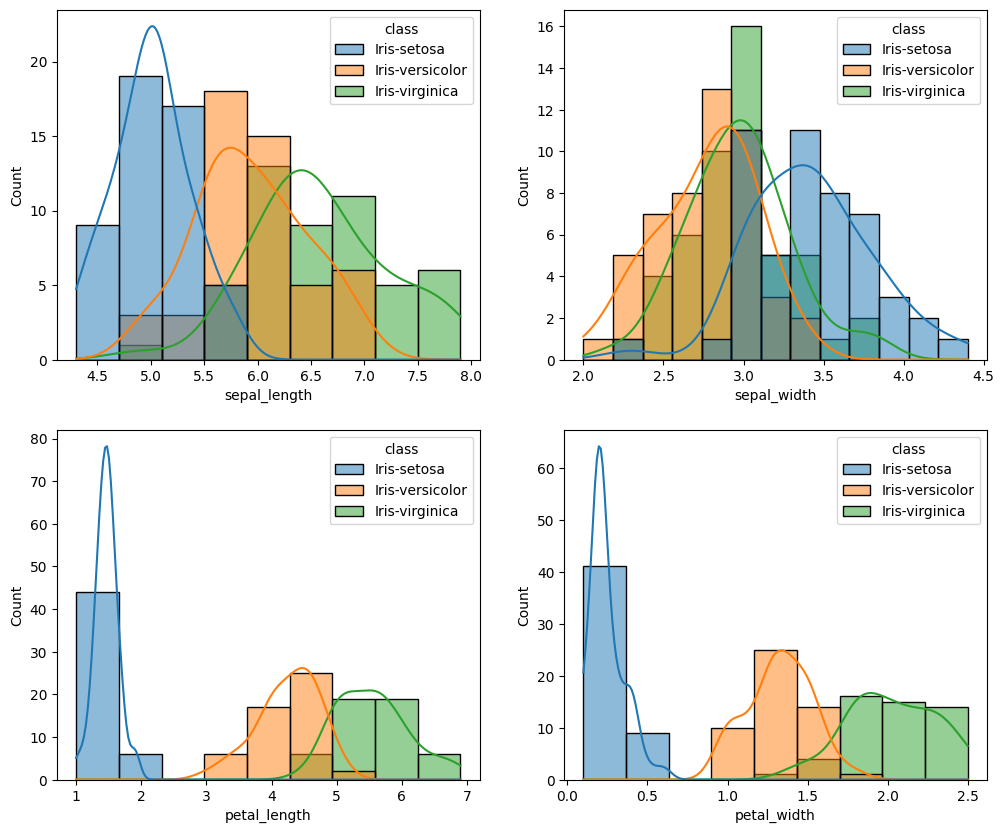

In [204]:
columns = df_iris.columns.tolist()
columns.remove('class')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(columns):
    sns.histplot(data=df_iris, x=col, hue='class', ax=axes[i//2, i%2], kde=True)
    

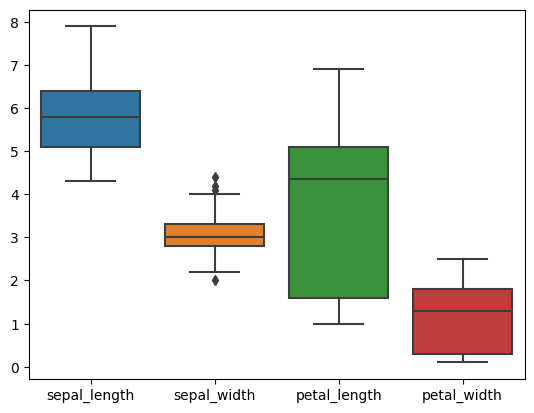

In [205]:
sns.boxplot(data=df_iris)
plt.show()

In [206]:
label_encoder= preprocessing.LabelEncoder()
df_iris['class_endcoder']= label_encoder.fit_transform(df_iris['class'])
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_endcoder
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [209]:
label_encoder.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [108]:
df_data = df_iris.copy()
df_data.drop('class', axis=1, inplace=True)

df_train, df_test = train_test_split(df_data, test_size=0.3, random_state=42)

X_train = df_train.drop('class_endcoder', axis=1)
y_train = df_train['class_endcoder']

X_test = df_test.drop('class_endcoder', axis=1)
y_test = df_test['class_endcoder']


In [109]:
y_train.unique()

array([1, 2, 0])

**Phân tích bộ dữ  liệu theo từng lớp qua các biểu đồ**

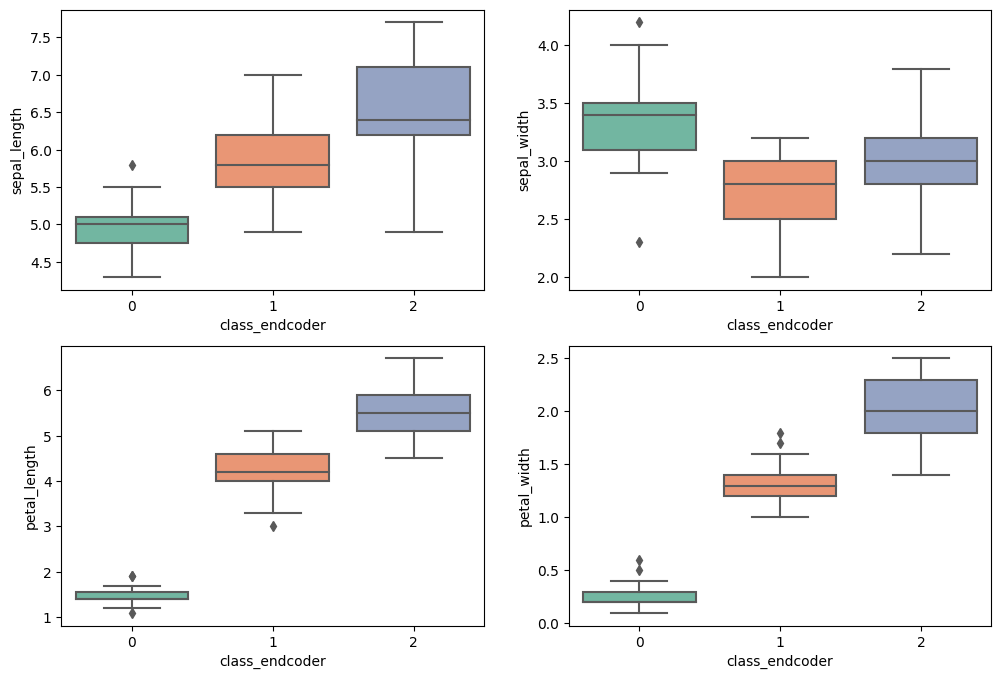

In [110]:
# Phân tích bộ dữ  liệu theo từng lớp qua các biểu đồ

columns = X_train.columns
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i,col in enumerate(columns):
    sns.boxplot(x=y_train, y=col, data=df_train, ax=ax[i//2][i%2], palette='Set2')
plt.show()
    

In [211]:
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

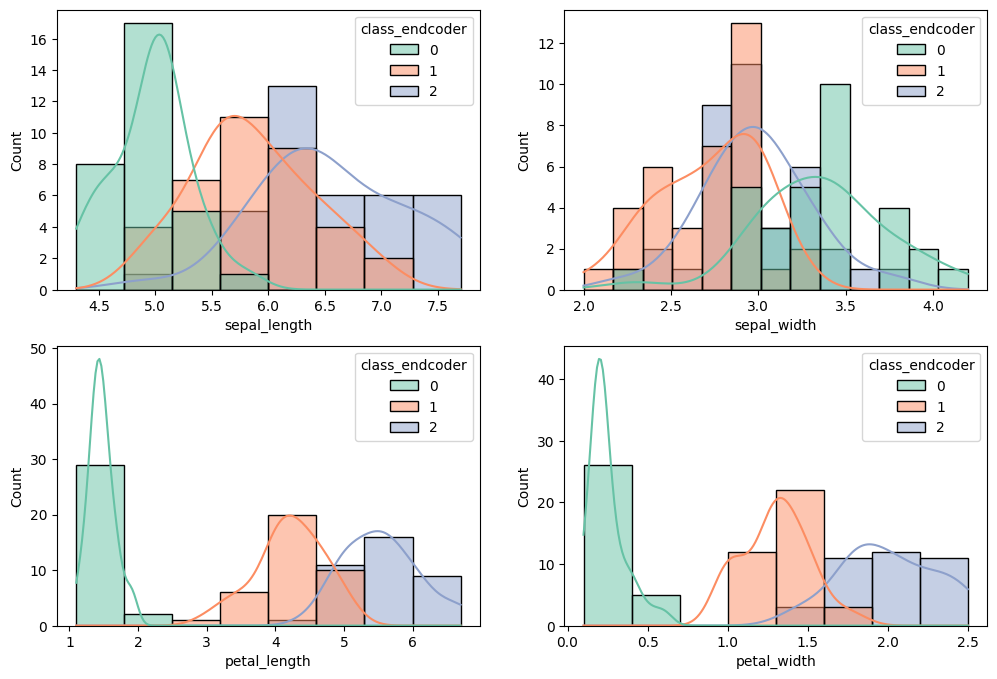

In [111]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i,col in enumerate(columns):
    sns.histplot(data=df_train, x=col, hue=y_train, ax=ax[i//2][i%2], kde=True,palette='Set2')
plt.show()

### 4. Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [119]:
knn= KNeighborsClassifier(n_neighbors=3)
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(knn, X=df_data.drop('class_endcoder', axis=1), y=df_data['class_endcoder'], cv=kf)

In [122]:
average_accuracy = scores.mean()
print("Độ chính xác trên từng fold trong 5-fold Cross Validation:\n", scores)
print("Độ chính xác trung bình trên 5-fold Cross Validation:", average_accuracy)

Độ chính xác trên từng fold trong 5-fold Cross Validation:
 [1.         0.96666667 0.96666667 0.93333333 0.96666667]
Độ chính xác trung bình trên 5-fold Cross Validation: 0.9666666666666668


### 5. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Linear Regression và Decision Tree.

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin

import json
import pickle


In [165]:
class CustomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def train(self, X_train, y_train, X_test, y_test):
        self.fit(X_train, y_train)
        y_pred = self.predict(X_test)
        return y_pred
    
    def f1_score(self, y_true, y_pred):
        return metrics.f1_score(y_true, y_pred, average='macro')
    
    def accuracy_score(self, y_true, y_pred):
        return metrics.accuracy_score(y_true, y_pred)
    
    def confusion_matrix(self, y_true, y_pred):
        return metrics.confusion_matrix(y_true, y_pred)


In [188]:
bayes_model = GaussianNB()
svm_model = SVC(kernel='linear')
linear_model = LinearRegression()
decision_tree_model = DecisionTreeClassifier()

models = [bayes_model, svm_model, linear_model, decision_tree_model]
report = []
for model in models:
    custom_classifier = CustomClassifier(model)
    custom_classifier.fit(X_train, y_train)
    
    with open(f'{model.__class__.__name__}.pkl', 'wb') as f:
        pickle.dump(custom_classifier, f)
    
    y_pred = custom_classifier.predict(X_test)
    if model.__class__.__name__ == 'LinearRegression':
        y_pred = np.round(y_pred)
        y_pred[y_pred==-0] = 0
    
    
    report.append({
        'model': model.__class__.__name__,
        'accuracy': custom_classifier.accuracy_score(y_test, y_pred),
        'f1_score': custom_classifier.f1_score(y_test, y_pred),
        'confusion_matrix': str(custom_classifier.confusion_matrix(y_test, y_pred)),
    })
    
    print(f"Model: {report[-1]['model']}")
    print(f"Accuracy: {report[-1]['accuracy']}")
    print(f"F1 Score: {report[-1]['f1_score']}")
    print(f"Confusion Matrix: \n{report[-1]['confusion_matrix']}")
    print("\n"*2+"-"*50+"\n"*2)
# save report to json

with open('report.json', 'w', encoding='utf-8') as f:
    json.dump(report, f, ensure_ascii=False, indent=4)

Model: GaussianNB
Accuracy: 0.9777777777777777
F1 Score: 0.974320987654321
Confusion Matrix: 
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


--------------------------------------------------


Model: SVC
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


--------------------------------------------------


Model: LinearRegression
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


--------------------------------------------------


Model: DecisionTreeClassifier
Accuracy: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


--------------------------------------------------




In [191]:

with open('model/DecisionTreeClassifier.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
y_pred = loaded_model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [192]:
import streamlit as st
import pickle
import os
import pandas as pd
from main import CustomClassifier

In [195]:
model_files = os.listdir('model')
selected_model = st.sidebar.selectbox('Select Model', model_files)
model_path = os.path.join('model', selected_model)

with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

def user_input_features():
    sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()
class_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
st.subheader('User Input parameters')
st.write(df)

# Load the saved model


# Predict the flower type
y_pred = loaded_model.predict(df)

st.subheader('Prediction')
st.write(f'Predicted class: {class_name[y_pred][0]}')
# st.write(f'Prediction probability: {prediction_proba[0][prediction][0]:.2f}')


DeltaGenerator()

In [214]:
# save X_test to csv
X_test.to_csv('X_test.csv', index=False, header=False)